In [18]:
#import necessary symbols and functions from the sympy library
from sympy import symbols, summation, Rational

#define symbols for the summation
k, N, h = symbols('k N h')

#define the expression for Distortion (D) using symbolic computation
D_expression = Rational(1, 2) * summation(Rational(1, 2) * (
    Rational(1, 3) * ((2 * k - N - 1) * h)**3 -
    (2 * k - N - 2) * h * ((2 * k - N - 1) * h)**2 +
    (2 * k - N - 2) * h * (2 * k - N - 3) * h**2
), (k, 1, N))

#specify a range of values for N (quantization levels)
N_values = list(range(3, 32, 2))

#generate a list of h values for different scenarios (5/N, 10/N, 20/N)
h_values = [Rational(5, N_val) for N_val in N_values] + [Rational(10, N_val) for N_val in N_values] + [Rational(20, N_val) for N_val in N_values]

#evaluate Distortion (D) for all combinations of N and h
D_results = [[D_expression.subs({N: N_val, h: h_val}).evalf() for h_val in h_values] for N_val in N_values]

#print the results
for i, N_val in enumerate(N_values):
    for j, h_val in enumerate(h_values):
        print(f"D({N_val}, {h_val}) = {D_results[i][j]}")



D(3, 5/3) = 25.4629629629630
D(3, 1) = 5.50000000000000
D(3, 5/7) = 2.00437317784257
D(3, 5/9) = 0.943072702331962
D(3, 5/11) = 0.516528925619835
D(3, 5/13) = 0.312926718252162
D(3, 1/3) = 0.203703703703704
D(3, 5/17) = 0.139934866680236
D(3, 5/19) = 0.100233270155999
D(3, 5/21) = 0.0742360436237987
D(3, 5/23) = 0.0565053012246240
D(3, 1/5) = 0.0440000000000000
D(3, 5/27) = 0.0349286186048875
D(3, 5/29) = 0.0281889376358194
D(3, 5/31) = 0.0230774394951495
D(3, 10/3) = 203.703703703704
D(3, 2) = 44.0000000000000
D(3, 10/7) = 16.0349854227405
D(3, 10/9) = 7.54458161865569
D(3, 10/11) = 4.13223140495868
D(3, 10/13) = 2.50341374601730
D(3, 2/3) = 1.62962962962963
D(3, 10/17) = 1.11947893344189
D(3, 10/19) = 0.801866161247995
D(3, 10/21) = 0.593888348990390
D(3, 10/23) = 0.452042409796992
D(3, 2/5) = 0.352000000000000
D(3, 10/27) = 0.279428948839100
D(3, 10/29) = 0.225511501086555
D(3, 10/31) = 0.184619515961196
D(3, 20/3) = 1629.62962962963
D(3, 4) = 352.000000000000
D(3, 20/7) = 128.27988

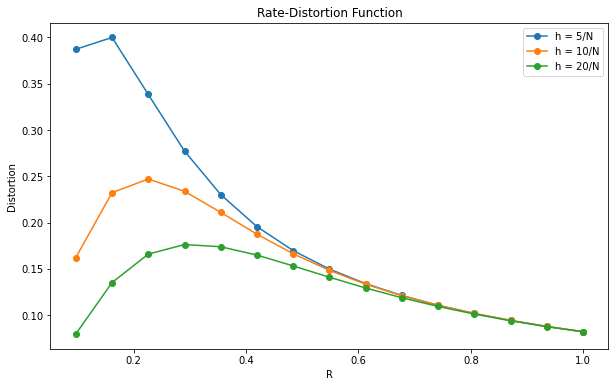

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#probability density function (PDF) for a standard normal distribution
def pdf(x):
    return 1 / (2 * np.pi) * np.exp(-np.abs(x) / 2)

#numerical integration using the trapezoidal rule
def integrate_trapezoidal(f, a, b, N=1000):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    y = f(x)
    integral = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    return integral

#function to compute distortion for a given threshold
def distortion(threshold):
    integrand = lambda x: x**2 * pdf(x)
    result = integrate_trapezoidal(integrand, threshold[1], threshold[0])
    return result

#function to compute distortion values for different k values
def compute_distortions(N_val, h_val):
    distortions = []
    for k_val in range(1, N_val + 1):
        threshold = ((2 * k_val - N_val - 1) * h_val, (2 * k_val - N_val - 2) * h_val)
        distortion_val = distortion(threshold)
        distortions.append(distortion_val)
    return distortions

#parameters
Ns = list(range(3, 32, 2))  # N = 3, 5, 7, ..., 31
hs = [5 / N for N in Ns]     # h = 5/N, 10/N, 20/N

#compute distortion values for different N and h
distortion_values = np.array([[np.mean(compute_distortions(N_val, h_val)) for N_val in Ns] for h_val in hs])

#transformation of N to R
R_values = np.array(Ns) / max(Ns)

#plotting the Rate-Distortion Function
plt.figure(figsize=(10, 6))

for i, label in enumerate(['h = 5/N', 'h = 10/N', 'h = 20/N']):
    plt.plot(R_values, distortion_values[i, :], marker='o', linestyle='-', label=label)

plt.title('Rate-Distortion Function')
plt.xlabel('R')
plt.ylabel('Distortion')
plt.legend()
plt.show()
